# A7. The Binomial Distribution

Date: 2020-10-13

## Background

This notebook is taken from **M248 Computer Book A: Activities 27-31**.

## About

This notebook uses `scipy.stats.binom` to answer some questions about probabilities involving this MCQ examination.

The following methods are invoked:

- `pmf(k)`
- `cdf(x)`

We then output the p.m.f. and c.d.f. to a `pd.DataFrame`, before visualing the p.m.f. in a barplot using `seaborn`.

Note that one method isn't used that could be useful: `sf(x)`.
This is the so-called *shadow function*, which outputs the solution to `1 - a_dist.cdf(x)`.

Also note that the output will be rounded to 6dp to increase readability.

## References

[scipy.stats.binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

## Computer activities

In [1]:
from scipy.stats import binom
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Scenario

> An examination consists of twenty multiple choice questions.
> For each question, the correct answer is one of five options.
> The random variable $T$ denotes the number of correct answers obtained by a student who guesses answers at random, has a binomial distribution $T \sim B(20, 0.2)$.

Let us first declare a variable `t` to hold a reference to the object created to model the scenario.

In [2]:
t: object = binom(n=20, p=0.2)

### 27. Calculate a probability mass function $P(T=t)$

> *In this activity you will ... find the probability that the student scores exactly 10 and so just passes the examination.*

We will use the method `pmf(k)` to calculate $P(T=10) = p(9)$.

In [3]:
round(t.pmf(10), 6)

0.002031

### 28. Calculate a cumulative distribution function $P(T \leq t)$

> To pass the test, the student must get at least 10 out of the 20 questions correct.
> In this activity, you will ... obtain the probability that the student fails the examination.

We will use the method `cdf(x)` to calculate $P(T<10) = P(T \leq 9) = F(9)$.

In [4]:
round(t.cdf(x=9), 6)

0.997405

### 29. Further examples

> Suppose that students have to retake the module the following year if they answer fewer than four questions out of twenty correctly.
> What is the probability that a student who guesses answers at random has to
retake the module?

The probability $P(T < 4) = F(3)$ is given by

In [5]:
round(t.cdf(x=3), 6)

0.411449

> Students who fail the examination (that is, score less than 10) are allowed to resit the examination without retaking the whole module if they answer at least four out of the twenty questions correctly.
> What is the probability that a student who guesses answers at random fails but is allowed to resit the examination?

The probability $P(4 \leq T < 10) = F(9) - F(3)$ is given by

In [6]:
round(t.cdf(9) - t.cdf(3), 6)

0.585956

### 30. Obtaining a table of results

> In this activity, you will obtain a table similar to Table 2 of Unit 3, containing values of the p.m.f. and the c.d.f. for the binomial distribution $B(20, 0.2)$.

The output will be held in a `pd.DataFrame`.

In [7]:
df_test: object = pd.DataFrame()

Instantiate a `np` array to hold $t \in T` and append this new array to the DataFrame.

In [8]:
df_test["t"] = np.arange(start=0, stop=21, step=1)

Now append a further two columns to the `DataFrame`.
The first will hold the p.m.f. $P(T=t)=p(t)$ and the second the c.d.f. $P(T \leq t)=F(t)$.

Note, we use the method [ndarray.round()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.round.html#numpy.ndarray.round) to achieve the desired level of accuracy.

In [9]:
df_test["p(t)"] =t.pmf(k=df_test["t"]).round(decimals=6)
df_test["F(t)"] =t.cdf(x=df_test["t"]).round(decimals=6)

Let us now output the table.

In [10]:
df_test

,t,p(t),F(t)
0,0,0.011529,0.011529
1,1,0.057646,0.069175
2,2,0.136909,0.206085
3,3,0.205364,0.411449
4,4,0.218199,0.629648
5,5,0.174560,0.804208
6,6,0.109100,0.913307
7,7,0.054550,0.967857
8,8,0.022161,0.990018
9,9,0.007387,0.997405


### Additional. Visualise the distribution

There is no associated activity for this subsection.
Let us visualise the p.m.f. of $T$.

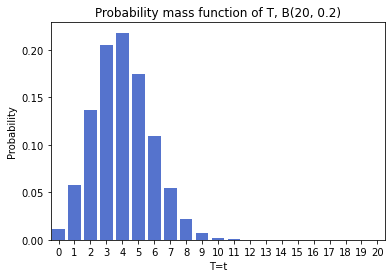

In [38]:
ax = sns.barplot(data=df_test,
                 x="t",
                 y="p(t)",
                 color="royalblue")
ax.set(xlabel="T=t",
       ylabel="Probability",
       title="Probability mass function of T, B(20, 0.2)")
plt.show()

### 31. Further examples

> A test consists of ten multiple choice questions, each of which has eight options.
> A student must answer at least five of the questions correctly to pass the test.

Let us declare a new variable to hold the refence to a `binom` object.

In [39]:
a_test = binom(n=10, p=1/8)

> Find the probability that a student who guesses answers at random answers exactly five questions correctly, and so just passes the test.

Let us calculate $P(T=5) \to$ `pmf(k=5)`

In [41]:
round(a_test.pmf(k=5), 6)

0.003944

> What is the probability that such a student fails the test?

Let us calculate $P(T<5) = F(4) \to$ `cdf(x=4)`

In [42]:
round(a_test.cdf(x=4), 6)

0.995545